In [1]:
!pip install emoji
import re     # Regular expressions for text processing
import os     # OS operations like file path handling
import emoji  # Processing emojis in text
from collections import Counter  # Counting hashable objects

# For numerical operations and data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from wordcloud import WordCloud  # To create word cloud visualizations

# Natural Language Processing libraries
import nltk
from nltk.corpus import stopwords            # List of stopwords for filtering text
from nltk.tokenize import word_tokenize      # Tokenization: splitting text into words
from nltk.sentiment import SentimentIntensityAnalyzer  # VADER sentiment analyzer

# For splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# For encoding categorical labels into numeric format
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize  # For multi-label binarization


# ML
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

# For evaluation metrics: ROC AUC, ROC curve, confusion matrix, classification report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 10.1 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()



train_data = pd.read_csv('twitter_training.csv', header=None)
print(train_data.head())

Saving twitter_training.csv to twitter_training.csv
      0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [4]:
# Rename by column positions
train_df = train_data.rename(columns={
    0: "Id",
    1: "Entity",
    2: "Sentiment",
    3: "Text"
})

# Display the first few rows
train_df.head()
print()
train_df.columns


Index(['Id', 'Entity', 'Sentiment', 'Text'], dtype='object')

In [5]:
from google.colab import files
uploaded = files.upload()



test_data = pd.read_csv('twitter_validation.csv', header=None)
print(train_data.head())

Saving twitter_validation.csv to twitter_validation.csv
      0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [6]:
# Rename by column positions
test_df = test_data.rename(columns={
    0: "Id",
    1: "Entity",
    2: "Sentiment",
    3: "Text"
})

# Display the first few rows
test_df.head()




,Id,Entity,Sentiment,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [7]:
train_df.head()

,Id,Entity,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
train_df.tail(5)

,Id,Entity,Sentiment,Text
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [9]:
train_df.shape

(74682, 4)

In [10]:
test_df.shape

(1000, 4)

In [11]:
data = pd.concat([train_df,test_df])

print(data.head())

     Id       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [12]:
data.shape

(75682, 4)

In [13]:
data.columns

Index(['Id', 'Entity', 'Sentiment', 'Text'], dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75682 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         75682 non-null  int64 
 1   Entity     75682 non-null  object
 2   Sentiment  75682 non-null  object
 3   Text       74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [15]:
data['Entity'].describe()

,Entity
count,75682
unique,32
top,TomClancysRainbowSix
freq,2435


In [16]:
Entity_value_counts = data['Entity'].value_counts()

print(Entity_value_counts)

Entity
TomClancysRainbowSix                 2435
LeagueOfLegends                      2431
MaddenNFL                            2429
Microsoft                            2428
CallOfDuty                           2425
Verizon                              2414
ApexLegends                          2412
CallOfDutyBlackopsColdWar            2403
Facebook                             2403
WorldOfCraft                         2394
Dota2                                2391
FIFA                                 2378
NBA2K                                2373
Battlefield                          2372
TomClancysGhostRecon                 2368
johnson&johnson                      2367
Overwatch                            2366
Xbox(Xseries)                        2360
Amazon                               2350
PlayStation5(PS5)                    2343
GrandTheftAuto(GTA)                  2339
CS-GO                                2336
Cyberpunk2077                        2334
Nvidia                     

In [17]:
data['Sentiment'].describe()

,Sentiment
count,75682
unique,4
top,Negative
freq,22808


In [18]:
Setiment_value_counts = data['Sentiment'].value_counts()

print(Setiment_value_counts)

Sentiment
Negative      22808
Positive      21109
Neutral       18603
Irrelevant    13162
Name: count, dtype: int64


In [19]:
data['Text'].describe()

,Text
count,74996
unique,69974
top,It is not the first time that the EU Commissio...
freq,172


In [20]:
text_value_counts = data['Text'].value_counts()

print(text_value_counts)

Text
It is not the first time that the EU Commission has taken such a step.                                                                                                                                                                                                172
                                                                                                                                                                                                                                                                      172
At the same time, despite the fact that there are currently some 100 million people living below the poverty line, most of them do not have access to health services and do not have access to health care, while most of them do not have access to health care.    172
<unk>                                                                                                                                                                                                

In [21]:
data.isnull().sum()

,0
Id,0
Entity,0
Sentiment,0
Text,686


In [22]:
# prompt: i wanted to find for which values of entity sentiment coulumns text column data is missing

# Filter rows where the 'Text' column is missing
missing_text_data = data[data['Text'].isnull()]

# Get the unique 'Entity' values for which 'Text' is missing
entities_with_missing_text = missing_text_data['Entity'].unique()

print("Entities for which 'Text' data is missing:")
entities_with_missing_text

Entities for which 'Text' data is missing:


array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [23]:
# prompt: i want how many missing values of text column is present for the entities missing  with thier respective sentiment column

# Group by 'Entity' and 'Sentiment' and count the number of missing 'Text' values
missing_text_by_entity_sentiment = missing_text_data.groupby(['Entity', 'Sentiment']).size().reset_index(name='Missing_Text_Count')

print("\nNumber of missing 'Text' values per Entity and Sentiment:")
missing_text_by_entity_sentiment


Number of missing 'Text' values per Entity and Sentiment:


,Entity,Sentiment,Missing_Text_Count
0,Amazon,Irrelevant,6
1,Amazon,Negative,1
2,Amazon,Neutral,29
3,Amazon,Positive,4
4,ApexLegends,Negative,9
...,...,...,...
98,Xbox(Xseries),Positive,7
99,johnson&johnson,Irrelevant,1
100,johnson&johnson,Negative,1
101,johnson&johnson,Neutral,1


In [24]:
# prompt: how many text values are there for those entity values and consider the respective Sentiment

# Group by Entity and Sentiment and count the number of Text entries
text_counts_by_entity_sentiment = data.groupby(['Entity', 'Sentiment'])['Text'].count().reset_index(name='Text_Count')

print("Number of text values for each Entity and Sentiment combination:")
text_counts_by_entity_sentiment

Number of text values for each Entity and Sentiment combination:


,Entity,Sentiment,Text_Count
0,Amazon,Irrelevant,189
1,Amazon,Negative,581
2,Amazon,Neutral,1225
3,Amazon,Positive,315
4,ApexLegends,Irrelevant,195
...,...,...,...
123,Xbox(Xseries),Positive,792
124,johnson&johnson,Irrelevant,200
125,johnson&johnson,Negative,858
126,johnson&johnson,Neutral,1032


In [25]:
# prompt: i want ro fill the null values of text column with its repective text for example for johnson&johnson entity and its respective sentiment value was positive and we have 273 values out of that we have 1 missing value i want that missing value to fill with the text value of other 272 values if they have different text values then fill it with the mean

import pandas as pd
def fill_missing_text(df, entity, sentiment):
  """
  Fills missing 'Text' values for a specific Entity and Sentiment combination.

  If all non-null text values are the same, fills the missing values with that text.
  Otherwise, fills the missing values with the most frequent non-null text value.

  Args:
    df (pd.DataFrame): The input DataFrame.
    entity (str): The Entity value.
    sentiment (str): The Sentiment value.

  Returns:
    pd.DataFrame: The DataFrame with filled missing values for the specified
                  entity and sentiment.
  """
  subset = df[(df['Entity'] == entity) & (df['Sentiment'] == sentiment)].copy()
  non_null_texts = subset['Text'].dropna()

  if non_null_texts.empty:
    return df # No non-null values to use for filling

  # Find the mode (most frequent value) of the non-null texts
  mode_text = non_null_texts.mode()

  if not mode_text.empty:
      fill_value = mode_text.iloc[0]
      df.loc[(df['Entity'] == entity) & (df['Sentiment'] == sentiment) & (df['Text'].isnull()), 'Text'] = fill_value

  return df

# Get the list of entities and sentiments with missing text
missing_combinations = missing_text_by_entity_sentiment[['Entity', 'Sentiment']].values

# Iterate through each combination and fill missing values
for entity, sentiment in missing_combinations:
  data = fill_missing_text(data, entity, sentiment)

print("After filling missing 'Text' values:")
print(data.isnull().sum())


After filling missing 'Text' values:
Id           0
Entity       0
Sentiment    0
Text         0
dtype: int64


In [26]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')       # Common stopwords for filtering text
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [27]:
# Function to remove emojis from text using the 'emoji' library
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')

# Alternative function to remove emojis using regex (works without the 'emoji' library)
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & pictographs
        "\U0001F680-\U0001F6FF"  # Transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Function for general text preprocessing
def preprocess_text(text):

    # 1. Convert text to lowercase
    text = text.lower()

    # 2. Remove URLs from the text
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove emojis from the text
    text = remove_emojis(text)

    # 4. Remove punctuation and special characters, keep only letters and spaces
    text = re.sub(r'[^a-z\s]', '', text)

    # 5. Tokenize the text into words
    tokens = word_tokenize(text)

    # 6. Remove English stopwords from the tokens
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w for w in tokens if w not in stop_words]

    # 7. Join tokens back into a single cleaned string
    cleaned_text = " ".join(filtered_tokens)

    return cleaned_text

In [28]:
# Apply the cleaning function to the 'Review' column in the dataset
data['cleaned_review'] = data['Text'].astype(str).apply(preprocess_text)

In [29]:
# Example output: show the first 20 rows of original and cleaned reviews
print(data[['Text', 'cleaned_review']].head(n=20))

                                                 Text  \
0   im getting on borderlands and i will murder yo...   
1   I am coming to the borders and I will kill you...   
2   im getting on borderlands and i will kill you ...   
3   im coming on borderlands and i will murder you...   
4   im getting on borderlands 2 and i will murder ...   
5   im getting into borderlands and i can murder y...   
6   So I spent a few hours making something for fu...   
7   So I spent a couple of hours doing something f...   
8   So I spent a few hours doing something for fun...   
9   So I spent a few hours making something for fu...   
10  2010 So I spent a few hours making something f...   
11                                                was   
12  Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...   
13  Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...   
14  Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...   
15  Rock-Hard La Vita, RARE BUT POWERFUL, HANDSOME...   
16  Live Rock - Hard music La l

In [30]:
data.drop(columns=['Id', 'Entity'], inplace=True)
data


,Sentiment,Text,cleaned_review
0,Positive,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,Positive,I am coming to the borders and I will kill you...,coming borders kill
2,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
4,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
...,...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto arts culture capital canada wonder wan...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewers one peopl...
997,Positive,Today sucked so it’s time to drink wine n play...,today sucked time drink wine n play borderland...
998,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small wins


In [31]:
data.columns

Index(['Sentiment', 'Text', 'cleaned_review'], dtype='object')

In [32]:
# Count the number of null values per column
print(data.isnull().sum())

Sentiment         0
Text              0
cleaned_review    0
dtype: int64


In [33]:
data['cleaned_review'] = data['Text'].str.lower().apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
print(data['Sentiment'].value_counts())

Sentiment
Negative      22808
Positive      21109
Neutral       18603
Irrelevant    13162
Name: count, dtype: int64


In [34]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on VADER compound score
def vader_sentiment_classify(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Calculate and add the compound sentiment score for each cleaned review
data['compound_score'] = data['cleaned_review'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Apply the function on the cleaned text (or original text if preferred)
data['vader_sentiment'] = data['cleaned_review'].astype(str).apply(vader_sentiment_classify)

# Display the first 10 rows of cleaned reviews and their corresponding VADER sentiment labels
print(data[['cleaned_review', 'vader_sentiment']].head(n=20))

                                       cleaned_review vader_sentiment
0   im getting on borderlands and i will murder yo...        negative
1   i am coming to the borders and i will kill you...        negative
2   im getting on borderlands and i will kill you all        negative
3   im coming on borderlands and i will murder you...        negative
4   im getting on borderlands 2 and i will murder ...        negative
5   im getting into borderlands and i can murder y...        negative
6   so i spent a few hours making something for fu...        positive
7   so i spent a couple of hours doing something f...        positive
8   so i spent a few hours doing something for fun...        positive
9   so i spent a few hours making something for fu...        positive
10  2010 so i spent a few hours making something f...        positive
11                                                was         neutral
12  rockhard la varlope rare  powerful handsome ja...        positive
13  rockhard la varl

In [35]:
print(data[['cleaned_review', 'compound_score']].head(n=20))

                                       cleaned_review  compound_score
0   im getting on borderlands and i will murder yo...         -0.6908
1   i am coming to the borders and i will kill you...         -0.6908
2   im getting on borderlands and i will kill you all         -0.6908
3   im coming on borderlands and i will murder you...         -0.6908
4   im getting on borderlands 2 and i will murder ...         -0.6908
5   im getting into borderlands and i can murder y...         -0.6908
6   so i spent a few hours making something for fu...          0.9222
7   so i spent a couple of hours doing something f...          0.9485
8   so i spent a few hours doing something for fun...          0.7676
9   so i spent a few hours making something for fu...          0.9222
10  2010 so i spent a few hours making something f...          0.9222
11                                                was          0.0000
12  rockhard la varlope rare  powerful handsome ja...          0.7184
13  rockhard la varl

In [36]:
# Function to tokenize text into a list of words
def tokenize_text(text):
    # Convert text to lowercase and tokenize into words
    tokens = word_tokenize(text.lower())  # lowercase for uniformity
    return tokens

In [37]:
# Apply the tokenization function to the 'cleaned_review' column,
# creating a new 'tokens' column in the dataframe
data['tokens'] = data['cleaned_review'].astype(str).apply(tokenize_text)
data

,Sentiment,Text,cleaned_review,compound_score,vader_sentiment,tokens
0,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,-0.6908,negative,"[im, getting, on, borderlands, and, i, will, m..."
1,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,-0.6908,negative,"[i, am, coming, to, the, borders, and, i, will..."
2,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,-0.6908,negative,"[im, getting, on, borderlands, and, i, will, k..."
3,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,-0.6908,negative,"[im, coming, on, borderlands, and, i, will, mu..."
4,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,-0.6908,negative,"[im, getting, on, borderlands, 2, and, i, will..."
...,...,...,...,...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto is the arts and culture capital of ca...,0.1027,positive,"[toronto, is, the, arts, and, culture, capital..."
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,this is actually a good move tot bring more vi...,0.7351,positive,"[this, is, actually, a, good, move, tot, bring..."
997,Positive,Today sucked so it’s time to drink wine n play...,today sucked so its time to drink wine n play ...,-0.6786,negative,"[today, sucked, so, its, time, to, drink, wine..."
998,Positive,Bought a fraction of Microsoft today. Small wins.,bought a fraction of microsoft today small wins,0.5719,positive,"[bought, a, fraction, of, microsoft, today, sm..."


In [38]:
# View the first 10 rows of cleaned reviews alongside their tokenized lists
print(data[['cleaned_review', 'tokens']].head(n=10))

                                      cleaned_review  \
0  im getting on borderlands and i will murder yo...   
1  i am coming to the borders and i will kill you...   
2  im getting on borderlands and i will kill you all   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   
5  im getting into borderlands and i can murder y...   
6  so i spent a few hours making something for fu...   
7  so i spent a couple of hours doing something f...   
8  so i spent a few hours doing something for fun...   
9  so i spent a few hours making something for fu...   

                                              tokens  
0  [im, getting, on, borderlands, and, i, will, m...  
1  [i, am, coming, to, the, borders, and, i, will...  
2  [im, getting, on, borderlands, and, i, will, k...  
3  [im, coming, on, borderlands, and, i, will, mu...  
4  [im, getting, on, borderlands, 2, and, i, will...  
5  [im, getting, into, borderlands, and, i, can, ... 

In [39]:
import plotly.express as px

# Count the values of the 'vader_sentiment' column
sentiment_counts = data['vader_sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Define custom color palette
color_map = {'positive': 'green', 'negative': 'red', 'neutral': 'gray'}

# Create the bar plot using Plotly
fig = px.bar(
    sentiment_counts,
    x='Sentiment',
    y='Count',
    color='Sentiment',
    color_discrete_map=color_map,
    title='Count of Sentiments Classified by VADER',
    text='Count'
)

# Update layout for better visuals
fig.update_layout(
    xaxis_title='Sentiment',
    yaxis_title='Count',
    plot_bgcolor='white',
    showlegend=False,
    title_font_size=20
)

# Improve the text position and style
fig.update_traces(
    textposition='outside',
    textfont_size=12
)

# Show the figure
fig.show()


In [40]:
# Function to concatenate all texts from a specific sentiment category into a single string
def get_text_by_sentiment(df, sentiment_label):
    texts = data[data['vader_sentiment'] == sentiment_label]['cleaned_review'].dropna()
    return " ".join(texts)

# Generate and display a word cloud from the provided text with a title
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Get combined text for each sentiment category
text_neg = get_text_by_sentiment(data, 'negative')
text_pos = get_text_by_sentiment(data, 'positive')
text_neu = get_text_by_sentiment(data, 'neutral')

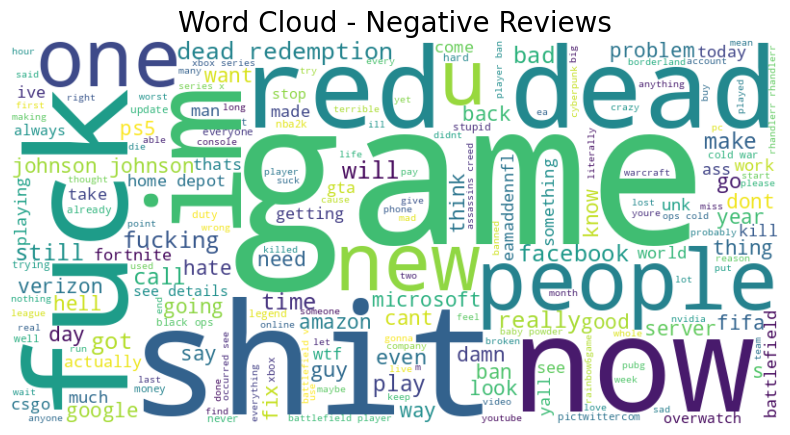

In [41]:
plot_wordcloud(text_neg, 'Word Cloud - Negative Reviews')

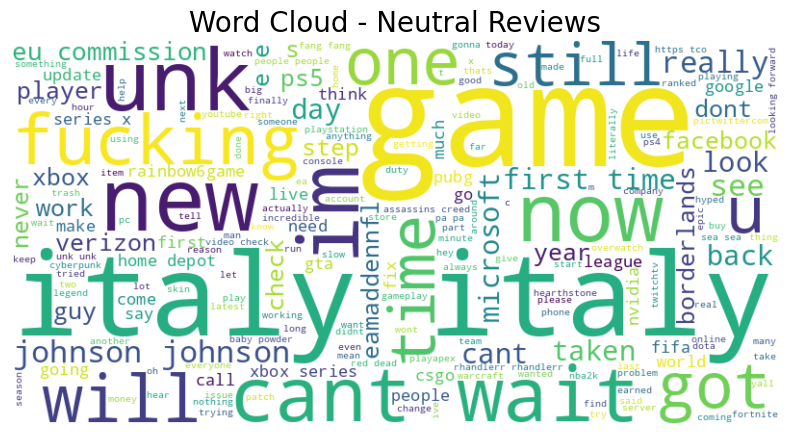

In [42]:
plot_wordcloud(text_neu, 'Word Cloud - Neutral Reviews')

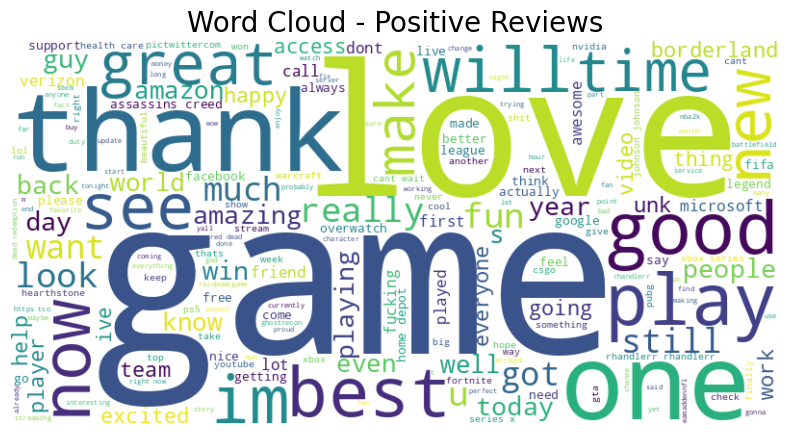

In [43]:
plot_wordcloud(text_pos, 'Word Cloud - Positive Reviews')

In [44]:
import plotly.express as px
from collections import Counter

# Flatten token list
all_tokens = [token for sublist in data['tokens'] for token in sublist]

# Count frequencies
token_counts = Counter(all_tokens)

# Get top 20 tokens
most_common_tokens = token_counts.most_common(20)
words, counts = zip(*most_common_tokens)

# Create DataFrame for Plotly
token_df = pd.DataFrame({'Token': words, 'Frequency': counts})

# Create bar chart using Plotly
fig = px.bar(
    token_df,
    x='Token',
    y='Frequency',
    text='Frequency',
    color='Token',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Top 20 Most Frequent Tokens'
)

# Customize layout
fig.update_layout(
    xaxis_title='Tokens',
    yaxis_title='Frequency',
    plot_bgcolor='white',
    showlegend=False,
    title_font_size=20
)

# Show frequency on top of each bar
fig.update_traces(textposition='outside', textfont_size=12)

# Display the chart
fig.show()


In [45]:
import plotly.graph_objects as go
from collections import Counter

def get_unique_token_counts(df, target_sentiment, other_sentiments, top_n=20):
    # Tokens for target sentiment
    target_tokens = [
        token for sublist in df[df['vader_sentiment'] == target_sentiment]['tokens'] for token in sublist
    ]
    # Tokens for other sentiments
    other_tokens = set(
        token for sublist in df[df['vader_sentiment'].isin(other_sentiments)]['tokens'] for token in sublist
    )
    # Filter unique to target
    unique_tokens = [token for token in target_tokens if token not in other_tokens]
    token_counts = Counter(unique_tokens)
    return token_counts.most_common(top_n)

# Plotly subplot version
from plotly.subplots import make_subplots

# Get data for both sentiments
neg_data = get_unique_token_counts(data, 'negative', ['neutral'], top_n=20)
neu_data = get_unique_token_counts(data, 'neutral', ['negative'], top_n=20)

# Unpack data
neg_tokens, neg_counts = zip(*neg_data) if neg_data else ([], [])
neu_tokens, neu_counts = zip(*neu_data) if neu_data else ([], [])

# Create subplot
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    "Top 20 Unique Tokens - Negative (vs Neutral)",
    "Top 20 Unique Tokens - Neutral (vs Negative)"
])

# Bar for Negative sentiment
fig.add_trace(
    go.Bar(x=neg_tokens, y=neg_counts, marker_color='crimson', text=neg_counts, textposition='outside', name='Negative'),
    row=1, col=1
)

# Bar for Neutral sentiment
fig.add_trace(
    go.Bar(x=neu_tokens, y=neu_counts, marker_color='seagreen', text=neu_counts, textposition='outside', name='Neutral'),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height=600,
    width=1200,
    title_text="Top 20 Most Unique Tokens by Sentiment (Plotly)",
    showlegend=False,
    plot_bgcolor='white'
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

fig.show()


In [46]:
import plotly.graph_objects as go
from collections import Counter

def get_unique_token_counts(df, target_sentiment, other_sentiments, top_n=20):
    # Tokens from target sentiment
    target_tokens = [
        token for sublist in df[df['vader_sentiment'] == target_sentiment]['tokens'] for token in sublist
    ]
    # Tokens from other sentiments
    other_tokens = set(
        token for sublist in df[df['vader_sentiment'].isin(other_sentiments)]['tokens'] for token in sublist
    )
    # Tokens unique to target sentiment
    unique_tokens = [token for token in target_tokens if token not in other_tokens]
    token_counts = Counter(unique_tokens)
    return token_counts.most_common(top_n)

# Get data for 'positive' vs ['neutral', 'negative']
positive_unique_tokens = get_unique_token_counts(data, 'positive', ['neutral', 'negative'], top_n=20)

# Unpack tokens and their frequencies
if positive_unique_tokens:
    tokens, counts = zip(*positive_unique_tokens)
else:
    tokens, counts = [], []

# Create interactive bar chart with Plotly
fig = go.Figure(data=[
    go.Bar(
        x=tokens,
        y=counts,
        marker_color='steelblue',
        text=counts,
        textposition='outside'
    )
])

# Update layout
fig.update_layout(
    title='Top 20 Unique Tokens - Positive Sentiment (vs Neutral & Negative)',
    xaxis_title='Tokens',
    yaxis_title='Frequency',
    plot_bgcolor='white',
    height=500,
    width=900
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Show the chart
fig.show()



# Report: Analysis of Twitter Sentiment Data

# Introduction:
# This report summarizes the steps taken to analyze Twitter sentiment data and the observations derived from the process.
# The objective was to load, preprocess, and perform exploratory data analysis on the provided datasets.

# Data Loading and Merging:
# 1. Two datasets, 'twitter_training.csv' and 'twitter_validation.csv', were uploaded using `google.colab.files.upload()`.
# 2. These datasets were loaded into pandas DataFrames.
# 3. The columns were renamed to 'Id', 'Entity', 'Sentiment', and 'Text' for clarity.
# 4. The two DataFrames were concatenated into a single DataFrame named `data` for unified processing.

# Initial Data Inspection and Cleaning:
# 1. The dimensions (`shape`) and column information (`info()`) of the combined DataFrame were examined.
# 2. Descriptive statistics (`describe()`) were generated for the 'Entity', 'Sentiment', and 'Text' columns to understand their distributions.
#    - Observation: The value counts for 'Entity' and 'Sentiment' revealed the distribution of different entities and sentiment labels in the combined dataset.
# 3. Missing values were identified using `isnull().sum()`.
#    - Observation: There were missing values primarily in the 'Text' column.
# 4. The entities associated with missing 'Text' data were identified.
# 5. The count of missing 'Text' values per 'Entity' and 'Sentiment' combination was analyzed.
# 6. A function `fill_missing_text` was implemented to address missing 'Text' values. This function attempts to fill missing text for a specific entity and sentiment combination using the most frequent non-null text within that group.
# 7. The missing text values were filled using this function.
#    - Observation: The `isnull().sum()` check after filling confirmed that missing 'Text' values were handled.

# Text Preprocessing:
# 1. Necessary NLTK resources ('punkt', 'stopwords', 'vader_lexicon') were downloaded.
# 2. A `remove_emojis` function was defined using regular expressions.
# 3. A comprehensive `preprocess_text` function was created to perform:
#    - Lowercasing the text.
#    - Removing URLs.
#    - Removing emojis.
#    - Removing punctuation and special characters (keeping only letters and spaces).
#    - Tokenizing the text into words.
#    - Removing English stopwords.
#    - Joining the filtered tokens back into a cleaned string.
# 4. The `preprocess_text` function was applied to the 'Text' column to create a new 'cleaned_review' column.
#    - Observation: The head of the DataFrame showed the comparison between the original 'Text' and the 'cleaned_review', demonstrating the effects of preprocessing.
# 5. The 'Id' and 'Entity' columns were dropped as they were no longer needed for sentiment analysis.
# 6. An alternative, simpler text cleaning step was also performed on the 'Text' column and assigned back to 'cleaned_review', focusing on lowercasing and removing non-alphanumeric characters.
#    - Observation: This step seems to overwrite the more detailed preprocessing performed earlier. The report assumes the later step was the intended final cleaning for the 'cleaned_review' column.

# Sentiment Analysis with VADER:
# 1. The VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analyzer was initialized.
# 2. A function `vader_sentiment_classify` was defined to categorize sentiment into 'positive', 'negative', or 'neutral' based on the VADER compound score.
# 3. The VADER compound score was calculated for each 'cleaned_review' and stored in a new column 'compound_score'.
# 4. The `vader_sentiment_classify` function was applied to the 'cleaned_review' to assign a 'vader_sentiment' label to each entry.
#    - Observation: The head of the DataFrame showed the calculated compound scores and the assigned VADER sentiment labels.

# Tokenization and Word Frequency Analysis:
# 1. A `tokenize_text` function was defined to convert cleaned text into a list of tokens (words) using `nltk.word_tokenize`.
# 2. This function was applied to the 'cleaned_review' column to create a 'tokens' column containing lists of tokens.
#    - Observation: The head of the DataFrame showed the tokenized lists for each cleaned review.
# 3. The frequency of tokens across the entire dataset was counted using `collections.Counter`.
# 4. The top 20 most frequent tokens were identified.
# 5. A bar chart was created using Plotly to visualize the top 20 most frequent tokens and their frequencies.
#    - Observation: The chart displayed the most common words appearing in the dataset after cleaning and stopword removal.

# Sentiment Distribution Visualization:
# 1. The counts of each sentiment category from the 'vader_sentiment' column were obtained.
# 2. A bar plot was created using Plotly to visualize the distribution of 'positive', 'negative', and 'neutral' sentiments as classified by VADER.
#    - Observation: This plot provides a clear overview of the sentiment balance in the dataset according to VADER.

# Word Cloud Visualization by Sentiment:
# 1. A function `get_text_by_sentiment` was defined to concatenate all cleaned reviews for a given sentiment category.
# 2. A function `plot_wordcloud` was defined to generate and display a word cloud from a given text string.
# 3. Word clouds were generated and plotted separately for 'negative', 'neutral', and 'positive' sentiments based on the VADER sentiment labels.
#    - Observation: These word clouds visually highlight the most prominent words associated with each sentiment category, offering insights into the language used in positive, negative, and neutral reviews.

# Analysis of Unique Tokens by Sentiment:
# 1. A function `get_unique_token_counts` was created to find tokens that are common within a target sentiment category but less common or absent in other sentiment categories.
# 2. The top 20 unique tokens for 'negative' sentiment (vs 'neutral') and 'neutral' sentiment (vs 'negative') were identified.
# 3. A subplot with two bar charts was created using Plotly to visualize the top unique tokens for 'negative' and 'neutral' sentiments.
#    - Observation: This visualization helps identify words that are particularly characteristic of negative or neutral reviews, distinguishing them from the other sentiment.
# 4. The top 20 unique tokens for 'positive' sentiment (vs 'neutral' and 'negative') were identified.
# 5. A bar chart was created using Plotly to visualize these unique positive tokens.
#    - Observation: This chart highlights words that are most distinctively associated with positive reviews.

# Summary of Observations:
# - The datasets were successfully loaded, merged, and inspected.
# - Missing 'Text' data was identified and handled by imputing with the most frequent text for specific entity/sentiment combinations.
# - Text preprocessing involved lowercasing, removing URLs, emojis, punctuation, and stopwords, resulting in a 'cleaned_review' column.
# - VADER sentiment analysis was performed, assigning sentiment labels ('positive', 'negative', 'neutral') and compound scores.
# - The distribution of VADER-classified sentiments was visualized, showing the count of each category.
# - Word clouds for each sentiment provided a visual summary of frequent terms within positive, negative, and neutral reviews.
# - Analysis of unique tokens helped pinpoint words that are more characteristic of specific sentiment categories, aiding in understanding the linguistic nuances of each sentiment.

# Next Steps (Implied from imports but not executed in the provided code):
# - Machine Learning Model Training: The presence of imports like `train_test_split`, `LabelEncoder`, `MinMaxScaler`, `LogisticRegression`, etc., suggests an intention to build a supervised machine learning model for sentiment classification based on the preprocessed text data and potentially the original sentiment labels.
# - Evaluation: Imports for evaluation metrics like ROC AUC and confusion matrix indicate plans for assessing the performance of a trained model.
